# Introdução

Instruções gerais:
- Vocês precisarão instalar provavelmente apenas uma biblioteca para essa aula (nba_api). Para os exercícios mais avançados, tem um processo mais complexo de instalação de aplicações e bibliotecas (a saber: google-api-python-client, google-auth-httplib2, google-auth-oauthlib)
- Precisaremos ter contas em alguns dos serviços que iremos utilizar se der tempo de chegar nos exercícios mais avançados. Tentem criar suas contas antes da aula, pois alguns são bastante complexos. Se não conseguirem não tem problema, aprenderemos bastante já com os serviços mais básicos. 
  - Para os exercícios intermediários, precisaremos de uma conta no Spotify (gratuita é suficiente) e uma conta no Youtube 
  - Para os exercícios avançados serão necessários uma conta no Google API, no Google Cloud Platform - GCP e no Twitter (a proposta é passar pelo processo de criação de conta com vocês)

# TEORIA

## API (Application Programming Interface)

Antes de falarmos de API, precisamos entender como a internet funciona e porque devemos separar as partes de um software.

## Como funciona o protocolo HTTP

A internet trafega através do protocolo **HTTP (*Hypertext Transfer Protocol*)**. O protocolo HTTP foi criado por **Tim Berners-Lee**, o criador da web, enquanto ele trabalhava na CERN em 1989 (sua equipe e ele também foram responsáveis pelo HTML).

O HTTP possui duas entidades básicas: a **Request (pedido)** e a **Response (resposta)**

Sempre que entramos em uma página, enviamos uma request para o servidor do site e esperamos uma response com o HTML da página.

Sempre que enviamos um ***Request (pedido)*** devemos especificar um método. A tabela abaixo cita os métodos mais comuns e explica brevemente o objetivo de cada um:

| Método |        Objetivo       |
|:------:|:---------------------:|
| GET    | Obter informações     |
| POST   | Salvar informações    |
| PUT    | Atualizar informações |
| DELETE | Deletar informações   |

Todos eles são comumente utilizados por APIs.

O método ***GET*** é o que seu navegador usa para baixar o HTML da página.

O metódo ***POST*** também é muito utilizado sempre que você envia algum formulário em um site.

Além do método, as requisições também possuem um **header**:

O **Header (cabeçalho)** tem a função de dizer para o servidor diversos dados sobre quem fez a solicitação. Dessa forma, o servidor consegue até permitir que você veja mais informações dependendo do seu nível de acesso.

### PROTOCOLO DE COMUNICAÇÃO HTTP
<img src="https://www.pubnub.com/wp-content/uploads/2014/11/HTTP-LONG-POLLING.png">
<br>
Os clientes, nossos computadores, conseguem acessar páginas e aplicações na internet atravez deste protocolo, que responde as requisições com arquivos de acordo com seu nível de acesso e com o que foi solicitado.
Se você acessar o site da Digital House por exemplo e pedir para inspecionar (no Chrome `Ctrl+Shift+i`) os dados de rede, vai ver todos as solicitações e respostas do seu navegador ao servidor.
<br>
O resultado será algo parecido com isso:
<img src="https://developer.chrome.com/devtools/images/network-panel.png">

## Códigos de status
A solicitação que acabamos de fazer tinha um código de status de 200. Os códigos de status são retornados com cada solicitação feita para um servidor da web. Códigos de status indicam informações sobre o que aconteceu com uma solicitação. Aqui estão alguns códigos que são relevantes para solicitações GET :

- 200 - tudo correu bem, e o resultado foi devolvido (se houver)
- 301- o servidor está redirecionando você para um terminal diferente. Isso pode acontecer quando uma empresa troca nomes de domínio ou um nome de terminal é alterado.
- 401- o servidor acha que você não está autenticado. Isso acontece quando você não envia as credenciais corretas para acessar uma API (falaremos sobre autenticação em uma postagem posterior).
- 400- o servidor acha que você fez um pedido incorreto. Isso pode acontecer quando você não envia os dados corretos, entre outras coisas.
- 403 - o recurso que você está tentando acessar é proibido - você não tem as permissões certas para visualizá-lo.
- 404 - o recurso que você tentou acessar não foi encontrado no servidor.

Se tentarmos acessar um site ou endereço que não existe, receberemos o código acima.

In [1]:
import requests

response = requests.get("http://www.globo.com/cursos/data_science")
print(response.status_code)

404


In [2]:
response = requests.get("http://api.open-notify.org/iss-pass.json")
print(response.status_code)

400


In [3]:
# This is the latitude and longitude of New York City.
parameters = {"q": 'data science'}

# Make a get request with the parameters.
response = requests.get("http://google.com/search", params=parameters)
print(response.status_code)

# Equivalente a URL: http://google.com/search?q=data+science

200


___

## O que é uma API?

Podemos dizer que uma API é como se fosse uma página da web só que para computadores. Só eles conseguirem acessar, ler e interagir da maneira adequada com as APIs.

Ao trabalhar com projetos que envolvem dados, é muito comum vocês utilizarão APIs tanto internas (fornecidas pelas próprias empresas em que vocês trabalham) quanto externas.

APIs são uma das principais formas para se obter dados que devem ser analisados.

<center>
<img src="https://cdn-images-1.medium.com/max/1600/1*CkynRe-J1FVnUAk7JmOTdQ.gif" alt="drawing" width="600px"></center>

### Por que acessar uma API ao invez de um banco de dados diretamente?

Porque o mundo está cheio de pessoas mal intencionadas e ao dar acesso direto ao banco de dados você está correndo risco de ter seus dados apagados, alterados ou que as pessoas tenham acesso a dados que deveriam ser confidenciais.

É uma forma de separar, controlar e até multiplicar os acessos a sistemas de forma organizada.
Imagine se cada cliente de um restaurante fosse fazer os pedidos direto ao Chef na cozinha, é provável que os pedidos saiam errados, fora de ordem ou o Chef fique estressado, por isso existe o garçom que faz o papel de levar os pedidos e trazer a comida organizando uma fila de pedidos.
A API faz exatamente isso, controlando o que pedir e para quem pedir.

<img src="https://cdn-images-1.medium.com/max/1600/1*Elr2TpvMI7xfSack20B6bA.png">

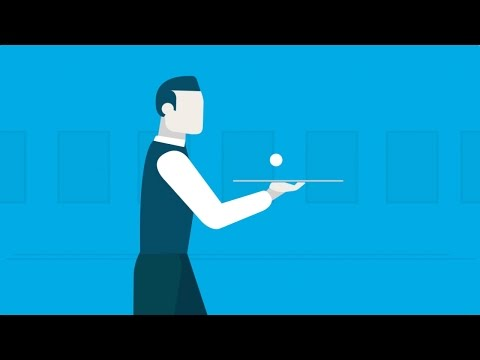

In [4]:
from IPython.display import Audio,Image, YouTubeVideo
id='s7wmiS2mSXY'

YouTubeVideo(id=id,width=600,height=300)

Mas por que usar uma API em vez de um conjunto de dados estáticos que você pode baixar? As APIs são úteis nos seguintes casos:

- Os dados estão mudando rapidamente. Um exemplo disso são os dados do preço das ações. Não faz muito sentido gerar um conjunto de dados e baixá-lo a cada minuto - isso demandará muita largura de banda e será bastante lento.
- Você quer um pequeno pedaço de um conjunto muito maior de dados. Comentários do Reddit são um exemplo. E se você quiser apenas puxar seus próprios comentários no Reddit? Não faz muito sentido baixar todo o banco de dados Reddit, depois filtrar apenas seus próprios comentários.
- Há computação repetida envolvida. Spotify tem uma API que pode dizer o gênero de uma peça musical. Você poderia, teoricamente, criar seu próprio classificador e usá-lo para categorizar a música, mas nunca terá tantos dados quanto o Spotify.

Em casos como os acima, uma API é a solução certa.

Agora, vamos consultar uma API simples para recuperar dados sobre a Estação Espacial Internacional (ISS). O uso de uma API nos poupará tempo e esforço ao fazermos todos os cálculos.
Então, faremos uma solicitação GET para http://api.open-notify.org/iss-passum terminal que não existe, de acordo com a documentação da API .

In [5]:
response = requests.get("http://api.open-notify.org/iss-pass")
print(response.status_code)

404


In [6]:
response = requests.get("http://api.open-notify.org/iss-now.json")
print(response.status_code)

200


In [7]:
response.text

'{"iss_position": {"latitude": "-51.1124", "longitude": "14.7339"}, "message": "success", "timestamp": 1598549371}'

In [8]:
# This is the latitude and longitude of New York City.
parameters = {"lat": 40.71, "lon": -74}

# Make a get request with the parameters.
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)
print(response.status_code)

200


In [9]:
response.url

'http://api.open-notify.org/iss-pass.json?lat=40.71&lon=-74'

In [10]:
response.content

b'{\n  "message": "success", \n  "request": {\n    "altitude": 100, \n    "datetime": 1598548352, \n    "latitude": 40.71, \n    "longitude": -74.0, \n    "passes": 5\n  }, \n  "response": [\n    {\n      "duration": 254, \n      "risetime": 1598595925\n    }, \n    {\n      "duration": 633, \n      "risetime": 1598601492\n    }, \n    {\n      "duration": 633, \n      "risetime": 1598607301\n    }, \n    {\n      "duration": 566, \n      "risetime": 1598613190\n    }, \n    {\n      "duration": 585, \n      "risetime": 1598619051\n    }\n  ]\n}\n'

In [11]:
type(response.content)

bytes

___

## XML × JSON × YAML

Anos atrás a comunicação entre serviços se dava por XML usando o padrão SOAP. Na era da mobilidade, JSON passou a ser largamente usado. Hoje, aos poucos está sendo substituido por YAML, que é similar,  porém mais amigável para leitura por humanos.

<img src="XML×JSON×YAML.png" width="150%"></img>

A estrutura de um json se parece muito com os dicionários em Python

Ele foi feito para que máquinas entendam seus dados e os utilizem como quiser.

Outra característica das APIs REST é a **divisão dos recursos**. Por exemplo:

https://jsonplaceholder.typicode.com/users/1

Ao abrirmos esta URL estamos fazendo um GET (o navegador executa o GET) para obtermos informações do usuário (/users) com código 1 (/1). Podemos trocar o código do usuário para buscar outros usuários.

Também podemos pedir todos os usuários digitando:

https://jsonplaceholder.typicode.com/users

## Trabalhando com dados JSON
Você deve ter notado que o conteúdo da resposta anterior era um string (embora tenha sido mostrado como um objeto, podemos facilmente converter o conteúdo em uma string usando response.content.decode("utf-8")).

As strings são a forma como passamos as informações para as APIs, mas é difícil obter as informações que queremos delas. Como decodificar a string que recebemos e trabalhar com ela em Python?

O JSON é uma maneira de codificar estruturas de dados, como listas e dicionários, para seqüências de caracteres que garantem que elas sejam facilmente legíveis por máquinas. JSON é o formato principal no qual os dados são passados para as APIs e a maioria dos servidores de API envia suas respostas nesse formato.

O Python tem um ótimo suporte a JSON, com a biblioteca 'json'. Ele faz parte da biblioteca padrão, portanto, não precisamos instalar nada para usá-lo. Podemos converter listas e dicionários em JSON e converter strings em listas e dicionários . No caso dos nossos dados do ISS Pass, é um dicionário codificado para uma string no formato JSON.

A biblioteca json possui dois métodos principais:

- dumps - Utiliza um objeto Python e o converte em uma string.
- loads - Leva uma string JSON e a converte em um objeto Python.

In [12]:
response.json()

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1598548352,
  'latitude': 40.71,
  'longitude': -74.0,
  'passes': 5},
 'response': [{'duration': 254, 'risetime': 1598595925},
  {'duration': 633, 'risetime': 1598601492},
  {'duration': 633, 'risetime': 1598607301},
  {'duration': 566, 'risetime': 1598613190},
  {'duration': 585, 'risetime': 1598619051}]}

In [13]:
type(response.json())

dict

In [14]:
meu_dicionario = response.json()
meu_dicionario

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1598548352,
  'latitude': 40.71,
  'longitude': -74.0,
  'passes': 5},
 'response': [{'duration': 254, 'risetime': 1598595925},
  {'duration': 633, 'risetime': 1598601492},
  {'duration': 633, 'risetime': 1598607301},
  {'duration': 566, 'risetime': 1598613190},
  {'duration': 585, 'risetime': 1598619051}]}

In [15]:
meu_request = meu_dicionario['request']
meu_request

{'altitude': 100,
 'datetime': 1598548352,
 'latitude': 40.71,
 'longitude': -74.0,
 'passes': 5}

In [16]:
meu_request['datetime']

1598548352

In [17]:
response.json()['request']['datetime']

1598548352

In [18]:
import json
print(json.dumps(response.json(), sort_keys=True, indent=4))

{
    "message": "success",
    "request": {
        "altitude": 100,
        "datetime": 1598548352,
        "latitude": 40.71,
        "longitude": -74.0,
        "passes": 5
    },
    "response": [
        {
            "duration": 254,
            "risetime": 1598595925
        },
        {
            "duration": 633,
            "risetime": 1598601492
        },
        {
            "duration": 633,
            "risetime": 1598607301
        },
        {
            "duration": 566,
            "risetime": 1598613190
        },
        {
            "duration": 585,
            "risetime": 1598619051
        }
    ]
}


## Parâmetros de consulta
Você verá que, no último exemplo, recebemos um código de status '400', que indica uma solicitação incorreta. Se você observar a documentação da API do OpenNotify, veremos que o ponto de extremidade do ISS Pass requer dois parâmetros.

O ponto de extremidade do ISS Pass retorna quando o ISS passará em seguida sobre um determinado local na Terra. Para calcular isso, precisamos passar as coordenadas do local para a API. Fazemos isso passando dois parâmetros - latitude e longitude.

Podemos fazer isso adicionando um argumento opcional de palavra-chave params, a nosso pedido. Neste caso, existem dois parâmetros que precisamos passar:

- lat - A latitude do local que queremos.
- lon - A longitude do local que queremos.

Podemos criar um dicionário com esses parâmetros e depois passá-los para a função 'requests.get'.

Nós também podemos fazer a mesma coisa diretamente, adicionando os parâmetros de consulta para a url, como este: http://api.open-notify.org/iss-pass.json?lat=40.71&lon=-74.

É quase sempre preferível configurar os parâmetros como um dicionário, porque requests cuida de algumas coisas que surgem, como formatar corretamente os parâmetros da consulta.

Faremos uma solicitação usando as coordenadas da cidade de São Paulo e veremos a resposta que recebermos.

__São Paulo__<br>
Latitude: -23.68<br>
Longitude: -46.87

In [19]:
# Este comando busca os mesmos dados que o comando que usamos para buscar os dados de São Paulo acima
response = requests.get("http://api.open-notify.org/iss-pass.json?lat=-23.68&lon=-46.87")
print(json.dumps(response.json(), sort_keys=True, indent=4))

{
    "message": "success",
    "request": {
        "altitude": 100,
        "datetime": 1598548353,
        "latitude": -23.68,
        "longitude": -46.87,
        "passes": 5
    },
    "response": [
        {
            "duration": 521,
            "risetime": 1598577790
        },
        {
            "duration": 651,
            "risetime": 1598583544
        },
        {
            "duration": 593,
            "risetime": 1598631755
        },
        {
            "duration": 614,
            "risetime": 1598637542
        }
    ]
}


## Uma mesma API pode conter diversas **ROTAS** ou endpoints diferentes 

Como o servidor faz para saber o que está sendo pedido na solicitação? Isso é especificado na URL (Uniform Resource Locator), uma espécie de caminho que indica onde um recurso pode ser encontrado.

- protocol: Indica o protocolo que será utilizado para acessar (HTTP, FTP, HTTPS)
- host: Indica como encontrar na rede (local ou internet) o servidor que tem o recurso
- port: Indica em qual porta o servidor está escutando. A 'porta' de um IP é o que permite que um computador se comunique simultaneamente com outros. Cada comunicação requer uma porta (são ao todo 65.535)
- path: Indica o caminho para localizar o recurso dentro do servidor. Como se fossem pastas do navegador de arquivos
- query: Indica qual é a consulta que está sendo realizada. Inclui quais são os argumentos desejados ou necessários, bem como os valores a ser utilizado para cada argumento

<img src="http://digitalad.com.br/DH/Picture1.png">
<br>

Por exemplo, podemos usar a funcionalidade dessa API da ISS para descobrir todas as pessoas que estão em orbita.

In [20]:
# Get the response from the API endpoint.
response = requests.get("http://api.open-notify.org/astros.json")
data = response.json()
print(json.dumps(response.json(), sort_keys=True, indent=4))

{
    "message": "success",
    "number": 3,
    "people": [
        {
            "craft": "ISS",
            "name": "Chris Cassidy"
        },
        {
            "craft": "ISS",
            "name": "Anatoly Ivanishin"
        },
        {
            "craft": "ISS",
            "name": "Ivan Vagner"
        }
    ]
}


Para conseguir capturar um dado específico do JSON, basta fazer as referências como se buscasse em um dicionário, identificando o tipo de cada elemento ou nível do dicionário (exemplo: um dicionário de listas, um dicionário de dicionários, etc).

In [21]:
print('Total de astronautas:', data["number"])
print('Primeiro da lista:', data["people"][0])
print('Nome do 1o da lista:', data["people"][0]['name'])

Total de astronautas: 3
Primeiro da lista: {'craft': 'ISS', 'name': 'Chris Cassidy'}
Nome do 1o da lista: Chris Cassidy


In [22]:
data['people']

[{'craft': 'ISS', 'name': 'Chris Cassidy'},
 {'craft': 'ISS', 'name': 'Anatoly Ivanishin'},
 {'craft': 'ISS', 'name': 'Ivan Vagner'}]

___

# PRÁTICA

## Acesso simples

### Mercado Livre
Vamos utilizar a API do MercadoLivre para consultar anúncios<br>
<strong>O que fazer</strong>: acesso, download, tratamento e cálculo<br>
<strong>Documentação</strong>: https://developers.mercadolivre.com.br/pt_br/api-docs-pt-br<br>
<strong>Objetivo</strong>: Qual o preço médio dos anúncios de iphones em Minas Gerais<br>
<strong>Desafio</strong>: Resolve o exercício através de uma função para permitir realizar a mesma consulta com outros itens ou estados<br>
<strong>Dica</strong>: Carregue seus dados para um dataframe para facilitar a manipulação dos dados

In [23]:
import sys
import json
import codecs
import urllib.request
import urllib.parse
import pandas as pd

def usage():
    print('Uso: {0} "PRODUTO"'.format(sys.argv[0]))
    print('Busque um produto por vez')
    sys.exit(1)


def busca(item):
    url = 'https://api.mercadolibre.com/sites/MLB/search?q={0}'.format(item)
    opener = urllib.request.build_opener()
    opener.addheaders = [
        ('User-agent',
         "Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201")]

    with opener.open(url) as fd:
        content = fd.read()
        encoding = fd.info().get_content_charset()
        content = content.decode(encoding)

    dic = json.loads(content)
    #utf-8

# encoding
# 0001 = 'A' (encoding 1)
# 0001 = '$' (encoding 2)

    
    return dic

In [24]:
temp = requests.get('https://api.mercadolibre.com/sites/MLB/search?q=iphone')

In [25]:
temp.json()

{'site_id': 'MLB',
 'query': 'iphone',
 'paging': {'total': 22693, 'offset': 0, 'limit': 50, 'primary_results': 1013},
 'results': [{'id': 'MLB1618920771',
   'site_id': 'MLB',
   'title': 'iPhone 7 Plus 128 Gb Prata 3 Gb Ram',
   'seller': {'id': 405964617,
    'permalink': None,
    'registration_date': None,
    'car_dealer': False,
    'real_estate_agency': False,
    'tags': None},
   'price': 3807,
   'currency_id': 'BRL',
   'available_quantity': 1,
   'sold_quantity': 0,
   'buying_mode': 'buy_it_now',
   'listing_type_id': 'gold_pro',
   'stop_time': '2040-07-31T19:01:45.000Z',
   'condition': 'new',
   'permalink': 'https://www.mercadolivre.com.br/iphone-7-plus-128-gb-prata-3-gb-ram/p/MLB6240136',
   'thumbnail': 'http://mlb-s2-p.mlstatic.com/729977-MLA40678415625_022020-I.jpg',
   'accepts_mercadopago': True,
   'installments': {'quantity': 12,
    'amount': 317.25,
    'rate': 0,
    'currency_id': 'BRL'},
   'address': {'state_id': 'BR-PR',
    'state_name': 'Paraná',
    

In [26]:
temp = busca('iphone')

In [27]:
temp

{'site_id': 'MLB',
 'query': 'iphone',
 'paging': {'total': 22719, 'offset': 0, 'limit': 50, 'primary_results': 1039},
 'results': [{'id': 'MLB1513918236',
   'site_id': 'MLB',
   'title': 'iPhone 11 64 Gb Preto 4 Gb Ram',
   'seller': {'id': 234000251,
    'permalink': 'http://perfil.mercadolivre.com.br/FASTSHOP+OFICIAL',
    'registration_date': '2016-11-09T09:05:35.000-04:00',
    'car_dealer': False,
    'real_estate_agency': False,
    'tags': ['brand',
     'large_seller',
     'messages_as_seller',
     'messages_as_buyer'],
    'seller_reputation': {'transactions': {'total': 281817,
      'canceled': 11829,
      'period': 'historic',
      'ratings': {'negative': 0.02, 'positive': 0.94, 'neutral': 0.04},
      'completed': 269988},
     'power_seller_status': 'platinum',
     'metrics': {'claims': {'rate': 0.0235,
       'value': 1546,
       'period': '3 months'},
      'delayed_handling_time': {'rate': 0, 'value': 0, 'period': '3 months'},
      'sales': {'period': '3 months

In [28]:
temp.keys()

dict_keys(['site_id', 'query', 'paging', 'results', 'secondary_results', 'related_results', 'sort', 'available_sorts', 'filters', 'available_filters'])

In [29]:
for anuncio in temp['results']:
    print(anuncio['title'])

iPhone 11 64 Gb Preto 4 Gb Ram
iPhone 11 128 Gb Preto 4 Gb Ram
iPhone 7 32 Gb Preto-fosco 2 Gb Ram
iPhone XR 64 Gb Preto 3 Gb Ram
iPhone 6s 64 Gb Cinza-espacial 2 Gb Ram
iPhone 8 Plus 64 Gb Ouro 3 Gb Ram
iPhone XR 128 Gb Preto 3 Gb Ram
iPhone 11 Pro Max 256 Gb Cinza-espacial 4 Gb Ram
iPhone XS 512 Gb Prata 4 Gb Ram
iPhone XS 256 Gb Prata 4 Gb Ram
iPhone XS 64 Gb Prata 4 Gb Ram
iPhone XR 256 Gb Coral 3 Gb Ram
iPhone 11 Pro 256 Gb Cinza-espacial 4 Gb Ram
iPhone 7 128 Gb Preto-fosco 2 Gb Ram
iPhone 11 256 Gb Preto 4 Gb Ram
iPhone 11 Pro Max 64 Gb Cinza-espacial 4 Gb Ram
iPhone 11 Pro 64 Gb Cinza-espacial 4 Gb Ram
iPhone 8 64 Gb Prata 2 Gb Ram
iPhone 6s 32 Gb Cinza-espacial 2 Gb Ram
iPhone X 64 Gb Cinza-espacial 3 Gb Ram
iPhone 8 Plus 128 Gb Cinza-espacial 3 Gb Ram
iPhone XS Max 256 Gb Ouro 4 Gb Ram
iPhone XS Max 64 Gb Cinza-espacial 4 Gb Ram
iPhone SE (2nd Generation) 64 Gb Preto 3 Gb Ram
iPhone 7 Plus 128 Gb Preto-fosco 3 Gb Ram
iPhone SE (2nd Generation) 128 Gb Preto 3 Gb Ram
iPhone 8 P

Transforme o resultado da API em um Dataframe

In [30]:
#Coloque seu código aqui
df = pd.DataFrame(temp['results'])
df.head()

,id,site_id,title,seller,price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,...,seller_address,attributes,differential_pricing,original_price,category_id,official_store_id,domain_id,catalog_product_id,tags,catalog_listing
0,MLB1513918236,MLB,iPhone 11 64 Gb Preto 4 Gb Ram,"{'id': 234000251, 'permalink': 'http://perfil....",4875.89,BRL,250,500,buy_it_now,gold_pro,...,"{'id': '', 'comment': '', 'address_line': '', ...","[{'value_id': '9344', 'values': [{'struct': No...",{'id': 33580182},NaN,MLB1055,942.0,MLB-CELLPHONES,MLB15149561,"[brand_verified, extended_warranty_eligible, g...",True
1,MLB1638935509,MLB,iPhone 11 128 Gb Preto 4 Gb Ram,"{'id': 259411419, 'permalink': 'http://perfil....",5050.00,BRL,1,0,buy_it_now,gold_pro,...,"{'id': '', 'comment': '', 'address_line': '', ...","[{'values': [{'struct': None, 'source': 1, 'id...",{'id': 33580182},NaN,MLB1055,NaN,MLB-CELLPHONES,MLB15149567,"[brand_verified, good_quality_picture, good_qu...",True
2,MLB1507604525,MLB,iPhone 7 32 Gb Preto-fosco 2 Gb Ram,"{'id': 336592499, 'permalink': 'http://perfil....",2290.99,BRL,1,25,buy_it_now,gold_pro,...,"{'id': '', 'comment': '', 'address_line': '', ...","[{'id': 'BRAND', 'name': 'Marca', 'values': [{...",{'id': 33580182},NaN,MLB1055,NaN,MLB-CELLPHONES,MLB6240116,"[good_quality_thumbnail, loyalty_discount_elig...",True
3,MLB1348930369,MLB,iPhone XR 64 Gb Preto 3 Gb Ram,"{'id': 234000251, 'permalink': 'http://perfil....",3399.00,BRL,250,500,buy_it_now,gold_pro,...,"{'id': '', 'comment': '', 'address_line': '', ...","[{'value_id': '9344', 'value_name': 'Apple', '...",{'id': 33580182},4499.9,MLB1055,942.0,MLB-CELLPHONES,MLB12866681,"[brand_verified, extended_warranty_eligible, g...",True
4,MLB1488721028,MLB,iPhone 6s 64 Gb Cinza-espacial 2 Gb Ram,"{'id': 61843260, 'permalink': 'http://perfil.m...",2418.00,BRL,1,0,buy_it_now,gold_pro,...,"{'id': '', 'comment': '', 'address_line': '', ...","[{'attribute_group_name': 'Outros', 'value_nam...",{'id': 33580182},NaN,MLB1055,NaN,MLB-CELLPHONES,MLB6127573,"[extended_warranty_eligible, good_quality_pict...",True


In [31]:
df.head(1).T

,0
id,MLB1513918236
site_id,MLB
title,iPhone 11 64 Gb Preto 4 Gb Ram
seller,"{'id': 234000251, 'permalink': 'http://perfil...."
price,4875.89
currency_id,BRL
available_quantity,250
sold_quantity,500
buying_mode,buy_it_now
listing_type_id,gold_pro


In [32]:
df.address.apply(pd.Series).head() # desmembrando a coluna address transformando em uma series

,state_id,state_name,city_id,city_name
0,BR-SP,São Paulo,QlItU1BDYWphbWFy,Cajamar
1,BR-MG,Minas Gerais,TUxCQ01PTjE2OWFh,Monte Belo
2,BR-SP,São Paulo,BR-SP-42,Campinas
3,BR-SP,São Paulo,QlItU1BDYWphbWFy,Cajamar
4,BR-MG,Minas Gerais,TUxCQ0JFTGU0ODdm,Belo Horizonte


In [33]:
df2 = df.merge(df.address.apply(pd.Series),left_index=True, right_index=True).drop('address', axis=1)

In [34]:
df2.head(1).T

,0
id,MLB1513918236
site_id,MLB
title,iPhone 11 64 Gb Preto 4 Gb Ram
seller,"{'id': 234000251, 'permalink': 'http://perfil...."
price,4875.89
currency_id,BRL
available_quantity,250
sold_quantity,500
buying_mode,buy_it_now
listing_type_id,gold_pro


In [35]:
df2.columns

Index(['id', 'site_id', 'title', 'seller', 'price', 'currency_id',
       'available_quantity', 'sold_quantity', 'buying_mode', 'listing_type_id',
       'stop_time', 'condition', 'permalink', 'thumbnail',
       'accepts_mercadopago', 'installments', 'shipping', 'seller_address',
       'attributes', 'differential_pricing', 'original_price', 'category_id',
       'official_store_id', 'domain_id', 'catalog_product_id', 'tags',
       'catalog_listing', 'state_id', 'state_name', 'city_id', 'city_name'],
      dtype='object')

In [36]:
print('Contagem:', df2.loc[df2.state_name=='Minas Gerais',:].price.count())
print('Média:', round(df2.loc[df2.state_name=='Minas Gerais',:].price.mean(),2))

Contagem: 4
Média: 3409.5


___

### NBA
Vamos utilizar a API da NBA para entender os principais jogadores das finais.<br>
<strong>O que fazer</strong>: consulta a API através de módulos e funções de uma biblioteca<br>
<strong>Documentação</strong>: https://github.com/swar/nba_api<br>
<strong>Objetivo</strong>: Qual a distância média de arremessos dos jogadores Kawhi Leonard e Stephen Curry na temporada 18/19<br>
<strong>Desafio</strong>: Plote um gráfico comparando o perfil de localização dos arremessos.<br>
<strong>Dica</strong>: A biblioteca tem muitos módulos e funções. Seja objetivo em encontrar aqueles que interessam ao problema

In [37]:
range_1 = 'Less Than 8 ft.'
range_2 = '8-16 ft.'
range_3 = '16-24 ft.'
range_4 = '24+ ft.'
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].scatter(shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_1,'LOC_X'], shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_1,'LOC_Y'], color='green')
ax[0].scatter(shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_2,'LOC_X'], shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_2,'LOC_Y'], color='yellow')
ax[0].scatter(shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_3,'LOC_X'], shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_3,'LOC_Y'], color='orange')
ax[0].scatter(shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_4,'LOC_X'], shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_4,'LOC_Y'], color='red')
ax[0] = draw_court(ax[0])
# Adjust plot limits to just fit in half court
ax[0].set_xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
ax[0].set_ylim(422.5, -47.5)
ax[0].set_title(shots1_df.PLAYER_NAME[0])
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)

ax[1].scatter(shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_1,'LOC_X'], shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_1,'LOC_Y'], color='green')
ax[1].scatter(shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_2,'LOC_X'], shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_2,'LOC_Y'], color='yellow')
ax[1].scatter(shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_3,'LOC_X'], shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_3,'LOC_Y'], color='orange')
ax[1].scatter(shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_4,'LOC_X'], shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_4,'LOC_Y'], color='red')
ax[1] = draw_court(ax[1])
# Adjust plot limits to just fit in half court
ax[1].set_xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
ax[1].set_ylim(422.5, -47.5)
ax[1].set_title(shots2_df.PLAYER_NAME[0])
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)

plt.show();

NameError: name 'plt' is not defined

___

## APIs com autenticação

### Spotify
Vamos utilizar a API do Spotify para experimentar o processo de autenticação.<br>
<strong>O que fazer</strong>: estudando a estrutura da API para conseguir a informação desejada<br>
<strong>Documentação</strong>: https://developer.spotify.com/documentation/web-api/<br>
<strong>Objetivo</strong>: Qual a popularidade média da cantora Teresa Cristina e sua música mais popular?<br>
<strong>Dica</strong>: É crítico entender a estrutura da API (quais são as possíveis requisições e quais dados cada uma entrega). Utilize o console (https://developer.spotify.com/console/) para facilitar esse entendimento.

In [ ]:
token = '' #pegar no site
cabecalho = {'Accept': 'application/json', 'Content-Type': 'application/json', 'Authorization': 'Bearer '+token}
cabecalho

In [ ]:
url = "https://api.spotify.com/v1/search"
q = 'Teresa Cristina'
q_type = 'artist'
market = 'BR'
parametros = {'q':q, 'type': q_type,  'market': market}
parametros

In [ ]:
resultado = requests.get(url, params=parametros, headers=cabecalho)

In [ ]:
print(resultado.url)
print(json.dumps(resultado.json(), sort_keys=True, indent=2))

___

## Nível 3: APIs com autenticação complexa (e/ou billing)

### Google Agenda

Vamos utilizar a API do Google Agenda para experimentar o processo de autenticação do Google.<br>
<strong>O que fazer</strong>: entender aspectos da autenticação por crendenciais e tokens.<br>
<strong>Documentação</strong>: https://developers.google.com/calendar/v3/reference<br>
<strong>Objetivo</strong>: Trazer os próximos 4 eventos na sua agenda do Google.<br>
<strong>Dica</strong>: o processo é complexo, mas o Google disponibiliza vários "quick start projects" funcionais. Para esse exercício podem seguir esse: https://developers.google.com/calendar/quickstart/python<br>
<strong>Bibliotecas</strong>: pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

### Twitter

___

# Próximos passos

Há milhares de APIs e cada uma delas tem um jeito próprio de lidar, ou seja, de fazer nossas solicitações de dados e envio de dados.

Uma das muitas vantagens das APIs é tornar as soluções encaixaveis e reutilizaveis em outros programas.

Na nossa área de ciência de dados, não só utilizamos APIs para consultar dados mas muitas vezes para fornecer nossa aplicação de machine learning como um serviço.

Há várias plataformas que monitoram as inúmeras APIs disponíveis: 
- https://99apis.com/home
- https://www.programmableweb.com/
- https://rapidapi.com/

Há também softwares utilizados na administração de APIs (tanto para consultas quanto para publicação). Entre os mais famosos estão o Postman (https://www.postman.com/) e o Insomnia (https://insomnia.rest/)